<a href="https://colab.research.google.com/github/Cheetah-lhp/MachineLearning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

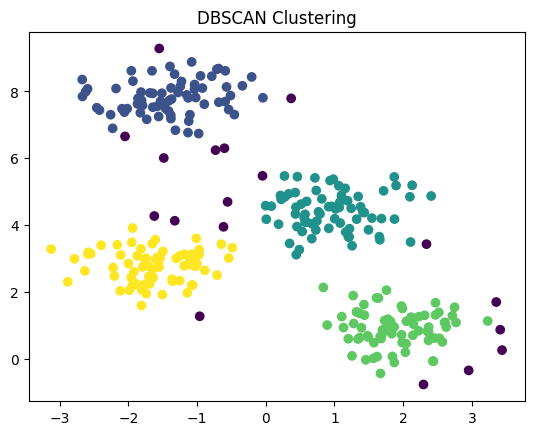

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generating example data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

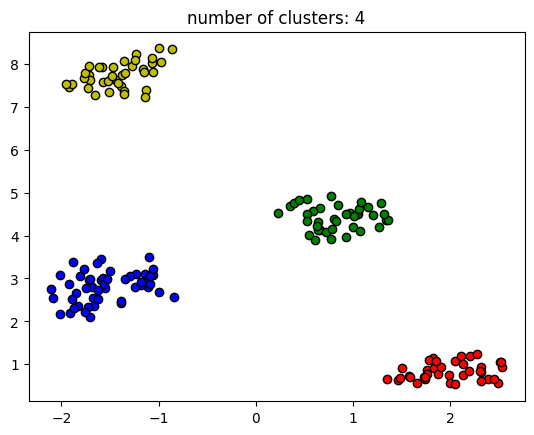

Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

# Apply DBSCAN algorithm
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

#print(labels)

# Plot result

# Black was removed and is used for the noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']

#print(colors)

# Loop through the data and plot the clusters with the different colors from the colors list
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black is used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

# Evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f"%sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f"%ari)



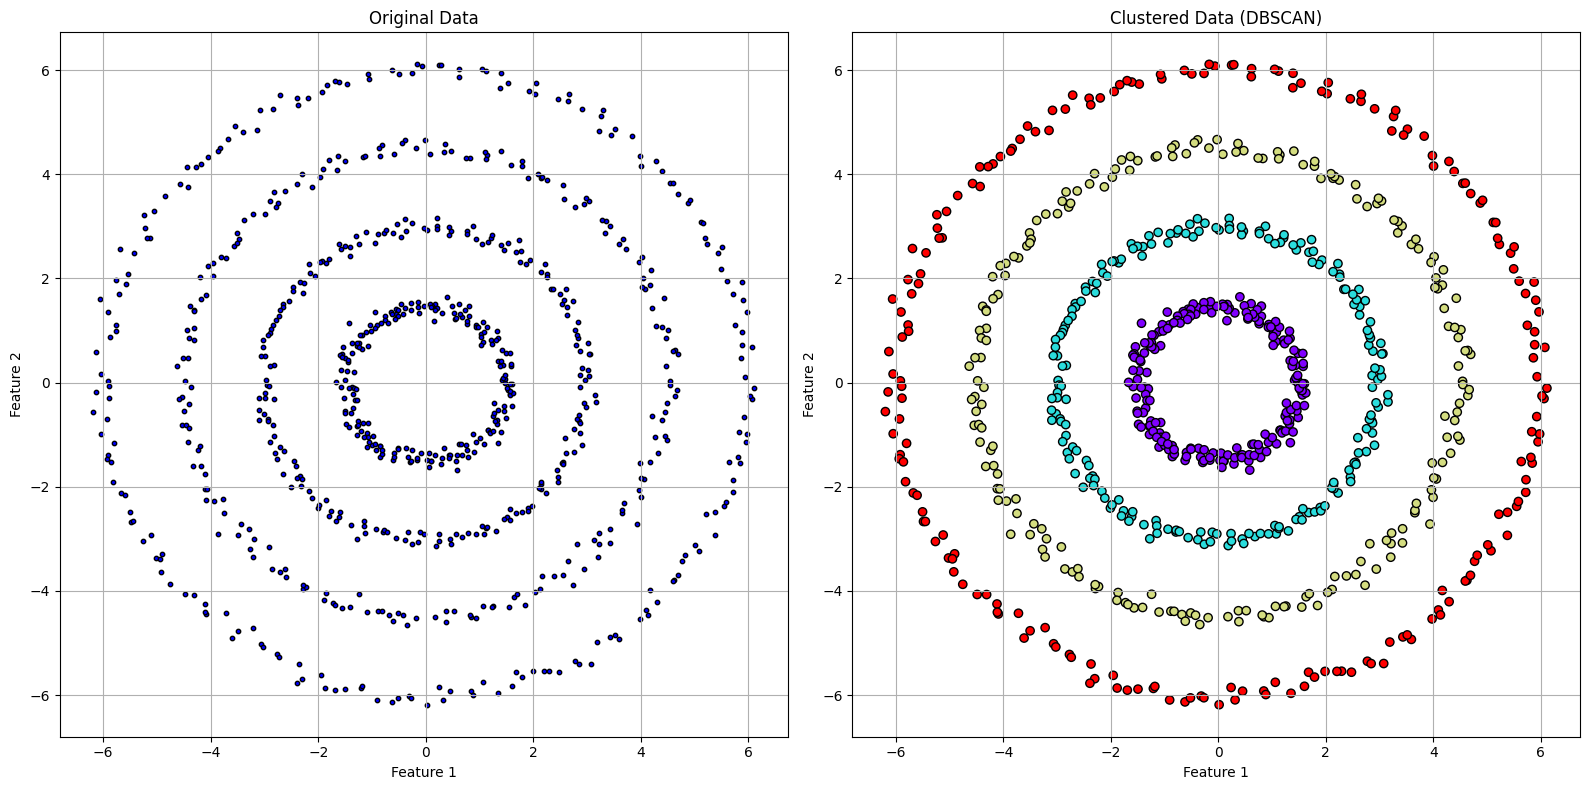

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def generate_ring_data(num_rings, points_per_ring, radius_increment, noise_level=0.1):
    """
    Generate concentric rings of data points.

    Parameters:
    - num_rings: Number of concentric rings
    - points_per_ring: Number of points per ring
    - radius_increment: Distance between consecutive rings
    - noise_level: Amount of random noise to add to the points

    Returns:
    - X: Array of data points
    """
    X = []

    for i in range(num_rings):
        radius = (i + 1) * radius_increment
        angles = np.linspace(0, 2 * np.pi, points_per_ring, endpoint=False)
        x_ring = radius * np.cos(angles)
        y_ring = radius * np.sin(angles)

        # Add random noise
        x_ring += np.random.normal(0, noise_level, points_per_ring)
        y_ring += np.random.normal(0, noise_level, points_per_ring)

        X.extend(list(zip(x_ring, y_ring)))

    return np.array(X)

# Parameters
num_rings = 4
points_per_ring = 200
radius_increment = 1.5
noise_level = 0.1
epsilon = 0.6  # DBSCAN parameter: maximum distance between points
minPts = 4     # DBSCAN parameter: minimum number of points to form a cluster

# Generate data
X = generate_ring_data(num_rings, points_per_ring, radius_increment, noise_level)

# Apply DBSCAN
db = DBSCAN(eps=epsilon, min_samples=minPts).fit(X)
labels = db.labels_

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot original data
axs[0].scatter(X[:, 0], X[:, 1], s=10, c='b', marker='o', edgecolors='k')
axs[0].set_title('Original Data')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].grid(True)

# Plot clustered data
scatter = axs[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolors='k')
axs[1].set_title('Clustered Data (DBSCAN)')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].grid(True)


plt.tight_layout()
plt.show()